# Stock Market EDA Analysis
**By:** Arshdeep Singh  
**Project:** Stock Market Exploratory Data Analysis using Python (Pandas, NumPy, Matplotlib, Seaborn)  

## Step 1 — Importing dependencies

In [1]:
import yfinance as yf
import datetime as dt 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 — Define Ticker List & Date Range
Defining the stock tickers to analyze and the historical date range.

In [3]:
Tickers = ['TCS','RELIANCE','HDFCBANK','SBIN','ICICIBANK']
Stocks = [i+ '.NS' for i in Tickers]

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=1096)

print(f"Tickers to analyze: {Stocks}")
print(f"Date Range: {start_date} to {end_date}")

Tickers to analyze: ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'SBIN.NS', 'ICICIBANK.NS']
Date Range: 2022-10-16 19:39:41.521942 to 2025-10-16 19:39:41.521942


## Step 3 — Data Download and Preparation
Fetch historical price data for the selected tickers from Yahoo Finance, select the 'Close' price, and calculate daily percentage returns, which are fundamental for financial analysis.

In [4]:
df = yf.download(Stocks, start=start_date, end=end_date)

Stocks_Close = df['Close']

C:\Users\singh\AppData\Local\Temp\ipykernel_9164\2907141870.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Stocks, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


In [7]:
# Check for any missing values
print("Missing values in Closing Prices:")
display(Stocks_Close.isna().sum())

# Calculate daily percentage returns 
pct_return = Stocks_Close.pct_change().dropna()
pct_return.columns = [col.replace('.NS', '_Return') for col in pct_return.columns]

display(Stocks_Close.head(5))
display(pct_return.head(5))

Missing values in Closing Prices:


Ticker
HDFCBANK.NS     0
ICICIBANK.NS    0
RELIANCE.NS     0
SBIN.NS         0
TCS.NS          0
dtype: int64

Ticker,HDFCBANK.NS,ICICIBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,
2022-10-17,696.033264,863.814087,1099.586182,514.167053,2849.046875
2022-10-18,694.734009,875.231445,1118.987427,531.947510,2879.215332
2022-10-19,701.855347,870.547363,1138.456909,523.388367,2858.294678
2022-10-20,697.115906,867.180786,1141.515503,525.279846,2890.751465
2022-10-21,692.207947,885.233887,1128.276978,530.434326,2872.531494


,HDFCBANK_Return,ICICIBANK_Return,RELIANCE_Return,SBIN_Return,TCS_Return
Date,,,,,
2022-10-18,-0.001867,0.013217,0.017644,0.034581,0.010589
2022-10-19,0.010250,-0.005352,0.017399,-0.016090,-0.007266
2022-10-20,-0.006753,-0.003867,0.002687,0.003614,0.011355
2022-10-21,-0.007040,0.020818,-0.011597,0.009813,-0.006303
2022-10-24,0.015605,0.021110,0.003338,0.017206,0.007745


## Step 4 — Summary Statistics

In [9]:
# Descriptive Statistics for Closing Prices
display(Stocks_Close.describe())

Ticker,HDFCBANK.NS,ICICIBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,821.321488,1108.938686,1293.375238,686.696342,3480.583442
std,83.673528,201.405508,140.118433,120.985868,412.555223
min,673.597473,797.456909,1004.863159,477.944153,2849.046875
25%,768.600647,921.217926,1174.690094,564.346008,3112.564514
50%,803.189667,1080.661560,1270.650085,724.146912,3395.374268
75%,860.974731,1273.324982,1422.078064,798.185287,3822.134094
max,1012.900024,1477.201782,1589.138184,887.822937,4389.965332


In [10]:
# Descriptive Statistics for Daily Returns
display(pct_return.describe())

,HDFCBANK_Return,ICICIBANK_Return,RELIANCE_Return,SBIN_Return,TCS_Return
count,741.000000,741.000000,741.000000,741.000000,741.000000
mean,0.000552,0.000731,0.000405,0.000848,0.000134
std,0.011880,0.011148,0.012757,0.014925,0.012503
min,-0.084358,-0.076336,-0.074851,-0.144040,-0.042192
25%,-0.005541,-0.004912,-0.007535,-0.006815,-0.006530
50%,0.000724,0.000634,0.000361,0.000949,-0.000637
75%,0.006754,0.006199,0.007230,0.008039,0.006267
max,0.056665,0.047161,0.070192,0.090685,0.066328


**Skewness** measures the asymmetry of returns. A negative skew indicates a longer left tail (higher probability of large negative returns).
**Kurtosis** measures the "tailedness" of the distribution. A value greater than 3 indicates "fat tails," meaning extreme outcomes are more likely than in a normal distribution.`

In [11]:
print("Skewness of Daily Returns:")
display(pct_return.skew())
print("\nKurtosis of Daily Returns:")
display(pct_return.kurt())

Skewness of Daily Returns:


HDFCBANK_Return    -0.679778
ICICIBANK_Return   -0.128187
RELIANCE_Return     0.265942
SBIN_Return        -0.825643
TCS_Return          0.646949
dtype: float64


Kurtosis of Daily Returns:


HDFCBANK_Return      6.025205
ICICIBANK_Return     4.630273
RELIANCE_Return      3.711984
SBIN_Return         14.034985
TCS_Return           3.053398
dtype: float64

In [47]:
annualized_return = pct_return.mean() * 252
annualized_volatility = pct_return.std() * np.sqrt(252)

summary_stats = pd.DataFrame({
'Annualized Return': annualized_return,
'Annualized Volatility': annualized_volatility
})

print("Annualized Return and Volatility:")
display(summary_stats)

Annualized Return and Volatility:


,Annualized Return,Annualized Volatility
HDFCBANK_Return,0.139189,0.188591
ICICIBANK_Return,0.184096,0.176969
RELIANCE_Return,0.102175,0.202508
SBIN_Return,0.213783,0.236919
TCS_Return,0.033792,0.198487


## Step 5 — Data Visualization
Visualize the data to compare performance, risk, and relationships between the stocks.

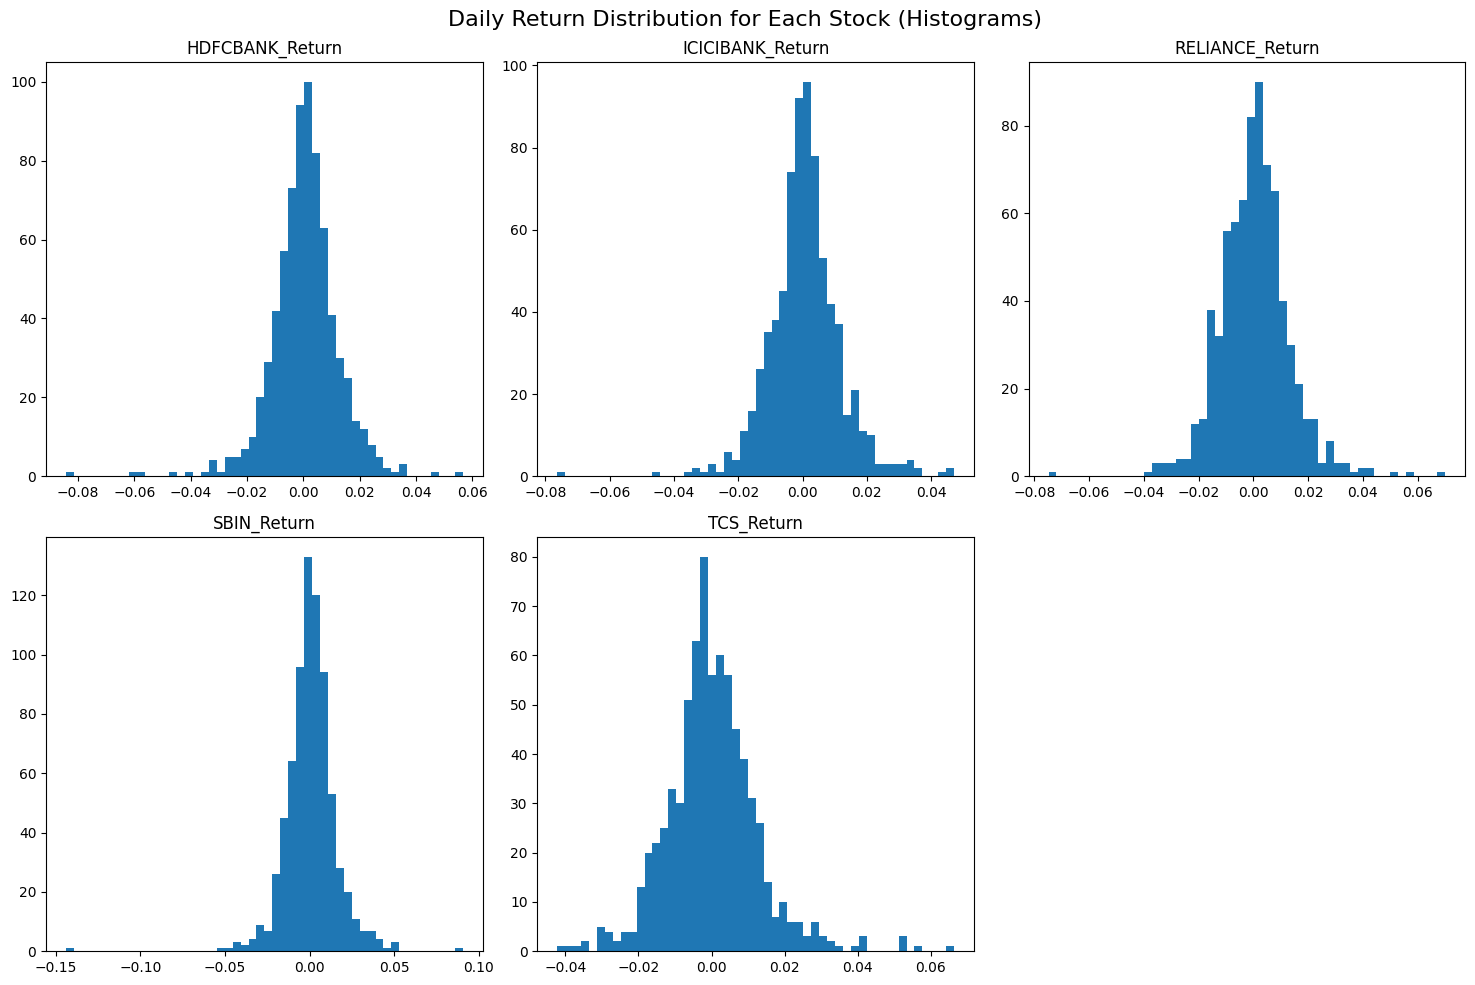

In [27]:
# Histograms of daily returns
pct_return.hist(bins=50, figsize=(15, 10), layout=(2, 3), grid=False)
plt.suptitle('Daily Return Distribution for Each Stock (Histograms)', size=16)
plt.tight_layout()
plt.show()

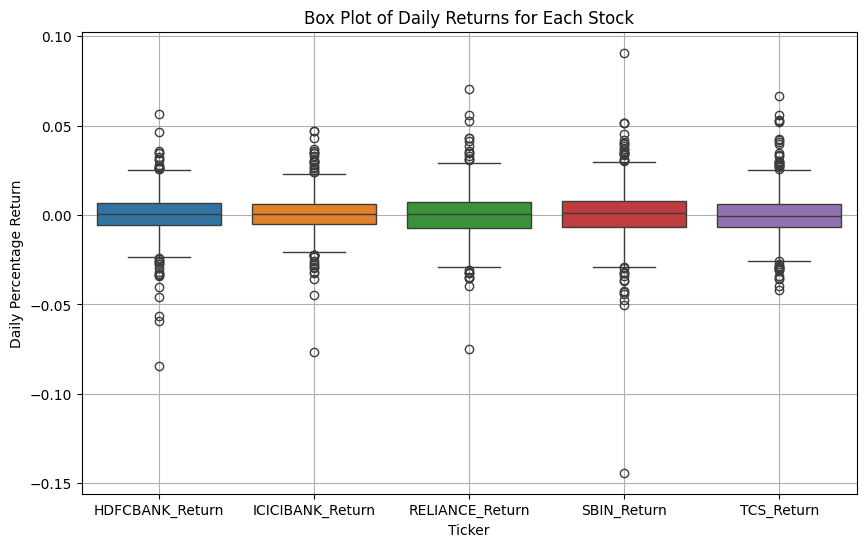

In [13]:
# Box Plot of daily returns
plt.figure(figsize=(10, 6))
sns.boxplot(data=pct_return)
plt.title('Box Plot of Daily Returns for Each Stock')
plt.ylabel('Daily Percentage Return')
plt.xlabel('Ticker')
plt.grid(True)
plt.show()

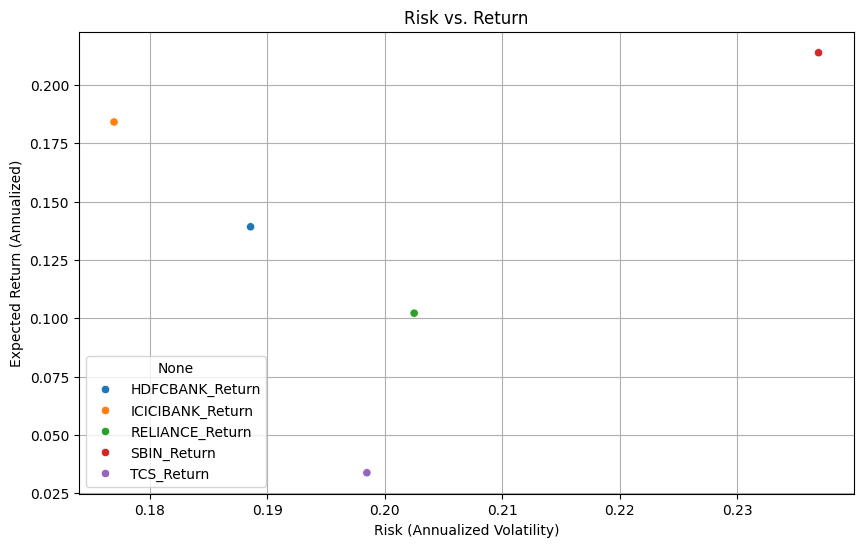

In [29]:
# Risk vs. Return scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=annualized_volatility, y=annualized_return, hue=summary_stats.index)
plt.xlabel('Risk (Annualized Volatility)')
plt.ylabel('Expected Return (Annualized)')
plt.title('Risk vs. Return')
plt.grid(True)
plt.show()

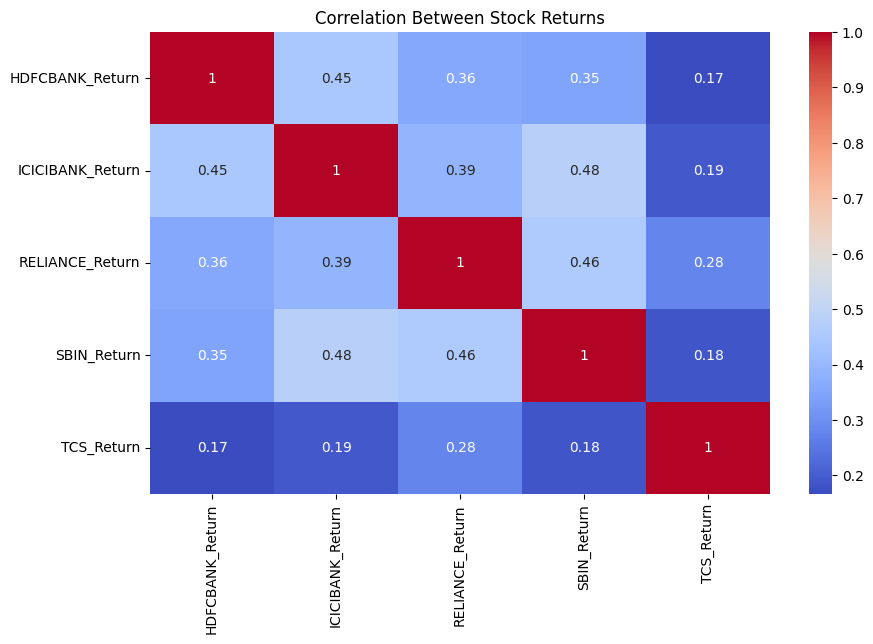

In [15]:
# Correlation Heatmap
corr = pct_return.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Returns')
plt.show()

<Figure size 2000x500 with 0 Axes>

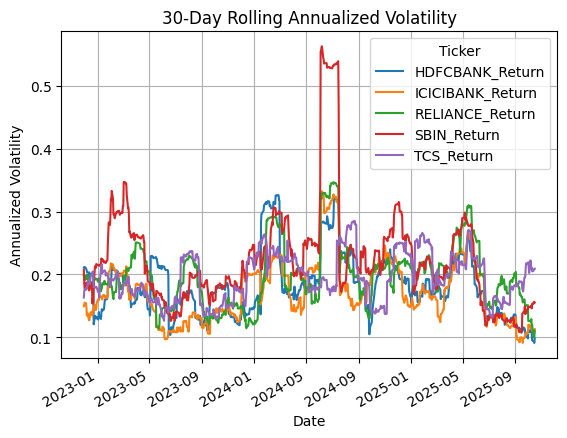

In [21]:
# 30-Day Rolling Annualized Volatility
rolling_vol = pct_return.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(20,5))
rolling_vol.plot()
plt.title('30-Day Rolling Annualized Volatility')
plt.ylabel('Annualized Volatility')
plt.xlabel('Date')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

## Step 6 — Answering Key Questions


**1. Which stock has delivered the highest annualized return over the period?**

In [40]:
highest_return_value = summary_stats['Annualized Return'].max() * 100
print(f"The stock with the highest annualized return is {highest_return_stock.replace('_Return', '')} with a return of {highest_return_value}%.")

The stock with the highest annualized return is SBIN with a return of 21.378269024201142%.


**2. Which stock showed the lowest volatility (most stable performance)?**

In [41]:
lowest_vol_value = summary_stats['Annualized Volatility'].min() * 100
print(f"The stock with the lowest annualized volatility is {lowest_vol_stock.replace('_Return', '')} with a volatility of {lowest_vol_value}%")

The stock with the lowest annualized volatility is ICICIBANK with a volatility of 17.69690900703015%


**3. Which stocks exhibit the highest peak rolling volatility?**

In [24]:
peak_rolling_vol = rolling_vol.max().sort_values(ascending=False)
print("Top 3 stocks by peak 30-day annualized volatility:")
display(peak_rolling_vol.head(3))  

Top 3 stocks by peak 30-day annualized volatility:


SBIN_Return         0.562960
RELIANCE_Return     0.346567
ICICIBANK_Return    0.332126
dtype: float64

**4. Which stocks pair are highly correlated and which are uncorrelated (good for diversification)?**

In [46]:
corr_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()
corr_pairs = corr_pairs[corr_pairs < 0.9999] # Filter out self-correlation

print("most correlated pair (move together):")
display(corr_pairs.head(1))

print("\nleast correlated pair (good for diversification):")
display(corr_pairs.tail(1))

most correlated pair (move together):


SBIN_Return  ICICIBANK_Return    0.478645
dtype: float64


least correlated pair (good for diversification):


HDFCBANK_Return  TCS_Return    0.1667
dtype: float64